In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
homeprice = pd.read_csv('/Users/hackthebox/Downloads/Machine-Learning-Self-Study/Regression/Multiple Regression/Data/homeprices.csv')

In [3]:
homeprice.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


- Here this dataset has missing value in 'bedrooms' columns.So,first of all let us clean the data or make the ready for the model.
- For this purpose,we have to either delete the row tat contains the missing value or subsitute appropriate value in taht place.

In [4]:
homeprice.isnull().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [5]:
# Impute the mising values through median
homeprice['bedrooms'].median()
# homeprice.bedrooms.median()
# homeprice['bedrooms'] = homeprice['bedrooms'].fillna(homeprice['bedrooms'].median())

4.0

In [6]:
# we got float value and convert to integer
# med = int(homeprice.bedrooms.median())
import math
med = math.floor(homeprice['bedrooms'].median())
# med = math.floor(homeprice.bedrooms.median())
med

4

#### Impute the missing value use of median

In [7]:
# homeprice.bedrooms = homeprice.bedrooms.fillna(med)
homeprice['bedrooms'] = homeprice['bedrooms'].fillna(homeprice['bedrooms'].median())

In [8]:
homeprice

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4400,5.0,8,795000


- Since the data is alright,we can check if we can apply Linear Regression model on this data or not.
- This can be done bt checking the relationships between 'area' and 'price', between 'bedrooms' and 'price' and between 'age' and 'price'.

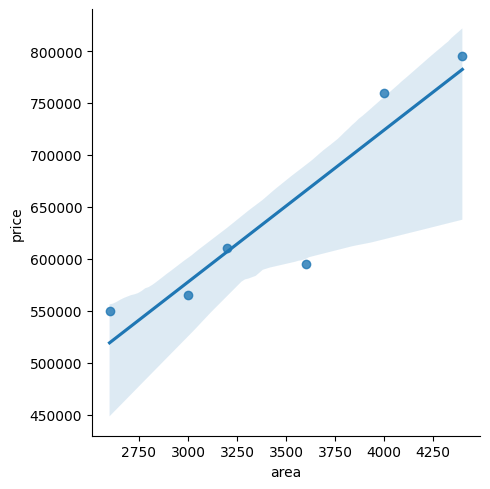

In [9]:
sns.lmplot(data=homeprice, x = 'area',y='price')

- Positive Relationship.

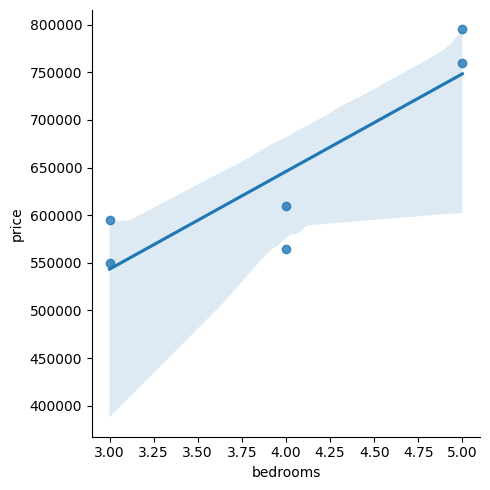

In [10]:
sns.lmplot(data=homeprice, x = 'bedrooms',y='price')

- Positive Relationship

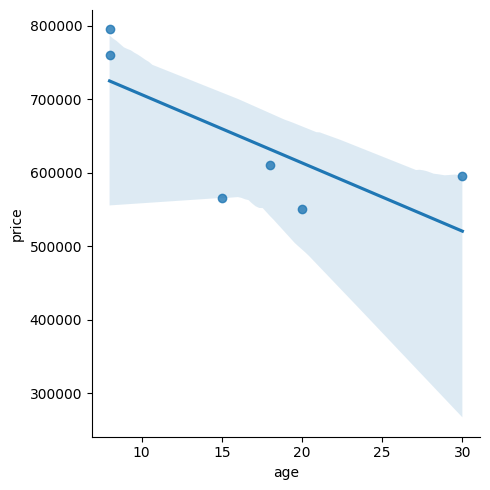

In [11]:
sns.lmplot(data=homeprice, x = 'age',y='price')

- Negative Relationship 
- Linear (or Straight line) Realationship

- Since there is linear or straight line relationship between the multiple independent variables(i.e.area,bedrooms,age) with the dependent or target variable(price).
- We can apply Multiple Linear Regression model on that data.

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
reg = LinearRegression()
reg

LinearRegression()

- Apply the model on that data using fit() method.
- We should remember that while passing the inputs(or Independent variables) ,we have to pass them in the form of 2D array and the output (or Dependent variable) should be given as 1D array

In [14]:
reg.fit(homeprice[['area','bedrooms','age']],homeprice['price'])

LinearRegression()

In [15]:
# find out the coeffiecient or slope
reg.coef_

array([   142.895644  , -48591.66405516,  -8529.30115951])

In [16]:
# find out the intercept
reg.intercept_

485561.8928233977

In [17]:
# Predict the value
reg.predict([[3000,3,40]]) # area,bedrooms,age

array([427301.78627387])

In [18]:
reg.predict([[2500,4,5]])

array([605787.84080221])